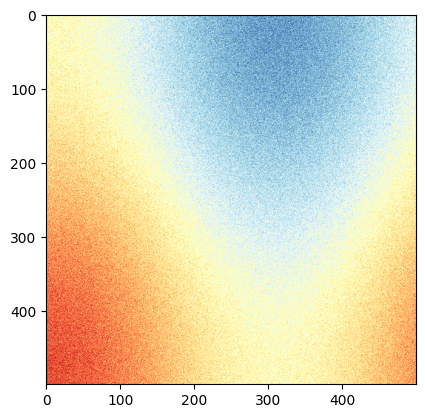

In [3]:
import skgstat as skg
import numpy as np
import matplotlib.pyplot as plt
from mix_n_match.correlations import calculate_variogram
import polars as pl
import datetime
xx, yy = np.mgrid[0:0.5 * np.pi:500j, 0:0.8 * np.pi:500j]
_field = np.sin(xx)**2 + np.cos(yy)**2 + 10
z = _field + np.random.normal(0, 0.15, (500,  500))
plt.imshow(z, cmap='RdYlBu_r')



In [2]:
coords = np.random.randint(0, 500, (300, 2))
values = np.fromiter((z[c[0], c[1]] for c in coords), dtype=float)
V = skg.Variogram(coords[:,-1], values)

/Users/yousefnami/Desktop/Main/2.Personal/MyStuff/2.Extracurriculars/Coding/DataScience/Repositories/mix-n-match/venv/lib/python3.10/site-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in divide
  Delta = norm(x0 * scale_inv / v**0.5)
/Users/yousefnami/Desktop/Main/2.Personal/MyStuff/2.Extracurriculars/Coding/DataScience/Repositories/mix-n-match/venv/lib/python3.10/site-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in scalar divide
  alpha *= Delta / Delta_new


/Users/yousefnami/Desktop/Main/2.Personal/MyStuff/2.Extracurriculars/Coding/DataScience/Repositories/mix-n-match/venv/lib/python3.10/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


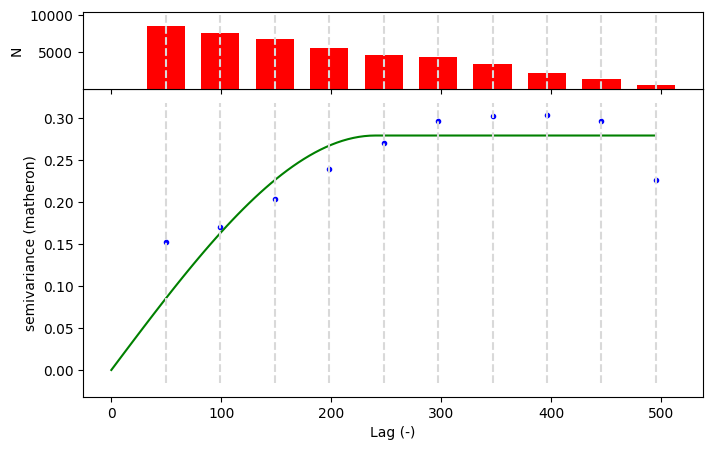

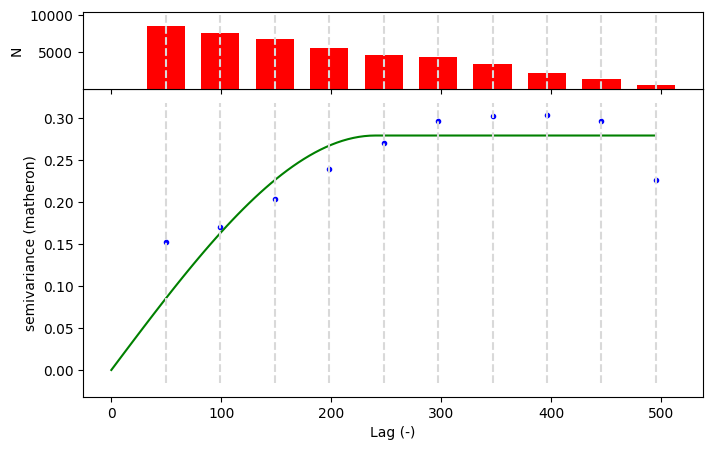

In [3]:
V.plot()

In [7]:


start = datetime.datetime.today().date()
dates = [start + datetime.timedelta(i+1) for i in range(500)]

dates_filtered = [dates[i] for i in coords[:, -1]]

lazy_df = pl.LazyFrame({
    "date": dates_filtered,
    "values": values
})


df = calculate_variogram(
    lazy_df=lazy_df,
    cardinal_direction='date',
    number_of_lags=10,
    lag_size='7d',
    delta='3d'
)

53.99688393797983
shape: (500, 2)
┌──────┬──────────┐
│ lags ┆ Date     │
│ ---  ┆ ---      │
│ str  ┆ f64      │
╞══════╪══════════╡
│ 1d   ┆ 0.779883 │
│ 2d   ┆ 0.809754 │
│ 3d   ┆ 0.833883 │
│ 4d   ┆ 0.849551 │
│ …    ┆ …        │
│ 497d ┆ 1.0      │
│ 498d ┆ 1.0      │
│ 499d ┆ 1.0      │
│ 500d ┆ 1.0      │
└──────┴──────────┘
shape: (500, 1)
┌──────┐
│ lags │
│ ---  │
│ str  │
╞══════╡
│ 1d   │
│ 2d   │
│ 3d   │
│ 4d   │
│ …    │
│ 497d │
│ 498d │
│ 499d │
│ 500d │
└──────┘


ConversionError: Failed to convert value(s) to axis units: shape: (500, 1)
┌──────┐
│ lags │
│ ---  │
│ str  │
╞══════╡
│ 1d   │
│ 2d   │
│ 3d   │
│ 4d   │
│ …    │
│ 497d │
│ 498d │
│ 499d │
│ 500d │
└──────┘

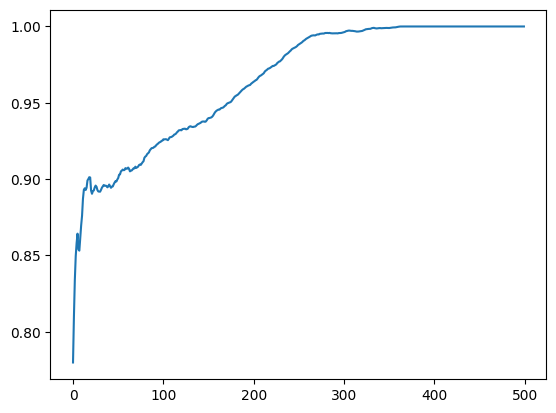

In [13]:
lazy_df = pl.read_csv("../data/daily-total-female-births.csv")
lazy_df = lazy_df.with_columns(
    pl.col("Date").str.strptime(pl.Date)
).lazy()

variance = lazy_df.select(pl.col("Births").var()).collect().item()
print(variance)
df = calculate_variogram(
    lazy_df=lazy_df.with_columns(
        pl.all()
        #Births=(pl.col("Births") - pl.col("Births").mean()) / pl.col("Births").std()
    ),
    cardinal_direction='Date',
    number_of_lags=500,
    lag_size='1d',
    delta='1m'
)
print(df.collect())

plt.plot(range(df.collect().shape[0]), df.select(pl.col("Date")).collect())
print(df.select(pl.col("lags")).collect())
plt.xticks(df.select(pl.col("lags")).collect())


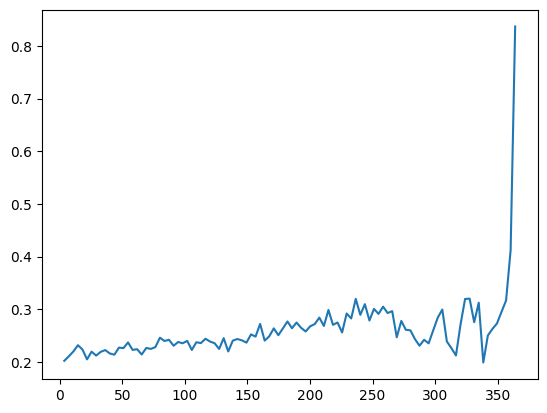

In [47]:
coords = np.linspace(1, 365, 365)
values = np.array(lazy_df.select(pl.col("Births")).collect().to_series().to_numpy())
V = skg.Variogram(coords, values, normalize=True, n_lags=100)

bins, values = V.get_empirical()
plt.plot(bins, values / values.var())

In [52]:
import geostatspy.geostats as geostats  

tmin = -9999
tmax = 9999
lag = 1
lag_tol = 0.1
nlag = 500
azi = 0
atol = 90


In [64]:
DF = lazy_df.collect().to_pandas().reset_index()
DF = DF.assign(index=DF['index']+1)

,index,Date,Births
0,1,1959-01-01,35
1,2,1959-01-02,32
2,3,1959-01-03,30
3,4,1959-01-04,31
4,5,1959-01-05,44
...,...,...,...
360,361,1959-12-27,37
361,362,1959-12-28,52
362,363,1959-12-29,48
363,364,1959-12-30,55


In [69]:
lags, gammas, npps = geostats.gamv(DF,"index","index","Births",tmin,tmax,lag,lag_tol,nlag,azi,atol, bandwh = list(range(100, 2000, 10)), isill=1)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function le>) found for signature:
 
 >>> le(float64, reflected list(int64)<iv=None>)
 
There are 22 candidate implementations:
    - Of which 18 did not match due to:
    Overload of function 'le': File: <numerous>: Line N/A.
      With argument(s): '(float64, reflected list(int64)<iv=None>)':
     No match.
    - Of which 2 did not match due to:
    Operator Overload in function 'le': File: unknown: Line unknown.
      With argument(s): '(float64, reflected list(int64)<iv=None>)':
     No match for registered cases:
      * (bool, bool) -> bool
      * (int8, int8) -> bool
      * (int16, int16) -> bool
      * (int32, int32) -> bool
      * (int64, int64) -> bool
      * (uint8, uint8) -> bool
      * (uint16, uint16) -> bool
      * (uint32, uint32) -> bool
      * (uint64, uint64) -> bool
      * (float32, float32) -> bool
      * (float64, float64) -> bool
    - Of which 2 did not match due to:
    Overload in function 'set_issubset': File: numba/cpython/setobj.py: Line 1623.
      With argument(s): '(float64, reflected list(int64)<iv=None>)':
     Rejected as the implementation raised a specific error:
       TypingError: All arguments must be Sets, got (float64, List(int64, True))
  raised from /Users/yousefnami/Desktop/Main/2.Personal/MyStuff/2.Extracurriculars/Coding/DataScience/Repositories/mix-n-match/venv/lib/python3.10/site-packages/numba/cpython/setobj.py:108

During: typing of intrinsic-call at /Users/yousefnami/Desktop/Main/2.Personal/MyStuff/2.Extracurriculars/Coding/DataScience/Repositories/mix-n-match/venv/lib/python3.10/site-packages/geostatspy/geostats.py (1911)

File "../venv/lib/python3.10/site-packages/geostatspy/geostats.py", line 1911:
def variogram_loop(x, y, vr, xlag, xltol, nlag, azm, atol, bandwh):
    <source elided>
                    # nested if statements
                    if (abs(dcazm) >= csatol) and (abs(band) <= bandwh):
                    ^


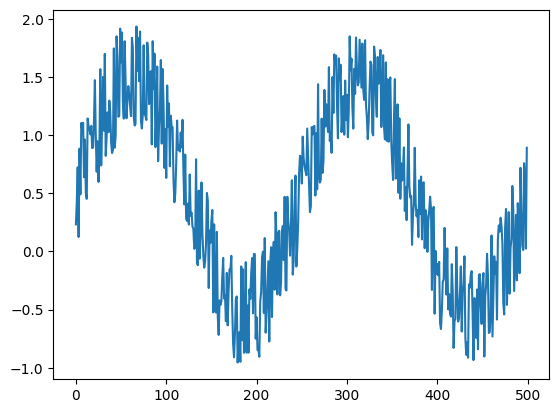

In [17]:
n_days = 500
date_range = [datetime.datetime.now().date() + datetime.timedelta(i+1) for i in range(n_days)]
random_data = np.sin(np.linspace(0, 4*np.pi, n_days)) + np.random.rand(n_days)
lf = pl.LazyFrame({"date": date_range, "values": random_data})
plt.plot(range(n_days), lf.select(pl.col("values")).collect())

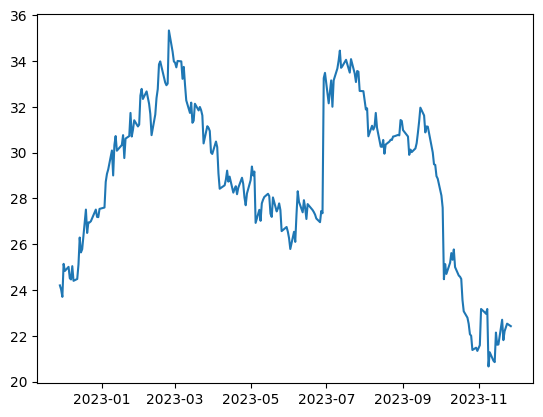

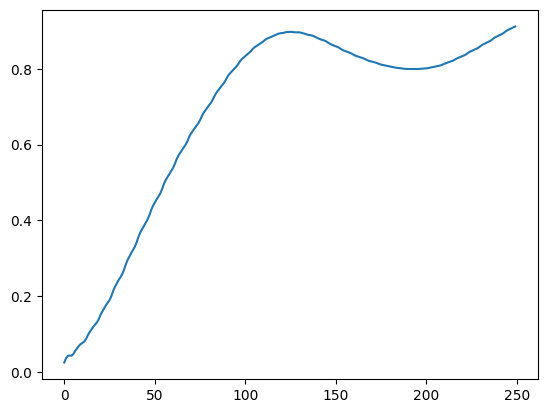

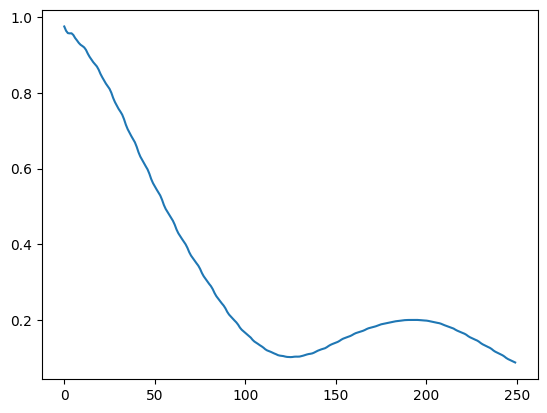

In [28]:
lf = pl.read_csv("../data/stocks_dummy.csv")
lf = lf.with_columns(pl.col("Date").str.strptime(pl.Date, format="%m/%d/%Y")).lazy()
df = calculate_variogram(
    lazy_df=lf.with_columns(
        pl.all()
        #Births=(pl.col("Births") - pl.col("Births").mean()) / pl.col("Births").std()
    ),
    cardinal_direction='Date',
    number_of_lags=250,
    lag_size='1d',
    delta='1m',
    target_col="Open"
)
plt.plot(lf.collect().select(pl.col("Date")), lf.collect().select(pl.col("Open")))
plt.figure()
plt.plot(range(df.collect().shape[0]), df.select(pl.col("Date")).collect())
plt.figure()

plt.plot(range(df.collect().shape[0]), df.select( 1 - pl.col("Date")).collect())